In [ ]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from itertools import combinations
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # Import VADER sentiment analyzer

# Ensure necessary NLTK resources are downloaded
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')  # Download the VADER lexicon

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Custom stopwords list grouped by categories
custom_stopwords = [

    # research stopwords
    'add', 'grant', 'use', 'study', 'research', 'objective', 'aim', 'method', 'approach',
    'results', 'revealed', 'findings', 'conclusion', 'analysis', 'data', 'significant', 'impact',
    'discussion', 'participants', 'subject', 'variables', 'hypothesis', 'population',
    'sample', 'literature', 'review', 'framework', 'theory', 'experiment', 'survey',
    'evaluation', 'assessment', 'implications', 'measure', 'different', 'digital',
    'instrument', 'validity', 'reliability', 'can', 'could', 'will', 'would', 'shall',
    'should', 'may', 'might', 'are', 'is', 'am', 'was', 'were', 'is', 'technology', '40',
    '2023', 'limited', 'express', 'computer', 'computers', 'internet', 'Internet',
    'environment', 'performance', 'behavior', 'communication', 'human', 'international',

    # education stopwords
    'aims', 'analyses','learning', 'learners', 'students', 'education', 'model', 'system', 'paper',
    'knowledge', 'information', 'methods', 'proposed', 'teaching',
    'educational', 'new', 'student', 'studies', 'development', 'provide', 'however',
    'learner', 'online', 'academic', 'faculty', 'course', 'design', 'group', 'support',
    'implication', '2022', 'skill', 'effect', 'process', 'activity', 'potential', 'pedagogical',

    # numerical stopwords
    'one', 'two', 'three', 'four', 'english', 'first', 'second', 'third', 'zero',
    'multiple', 'additional', 'various', 'each', 'among', 'within', 'between', 'de', 'licence',
    '40', '143', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',

    # general stopwords
    'context', 'perspective', 'concept', 'practice', 'experience', 'skills',
    'goals', 'objectives', 'outcomes', 'problems', 'questions', 'inquiries',
    'investigations', 'studies', 'analyses', 'ass', 'assessments', 'evaluations', 'reviews', 'surveys',
    'experiments', 'tests', 'trials', 'exercises', 'demonstrations', 'exemplars', 'cases',
    'instances', 'examples', 'illustrations', 'representations', 'accounts', 'reports',
    'descriptions', 'explanations', 'interpretations', 'arguments', 'defenses', 'advocacies', 'critiques',
    'reflections', 'contemplations', 'meditations', 'ruminations', 'deliberations', 'discussions',
    'conversations', 'dialogues', 'debates', 'exchanges', 'interactions', 'communications', 'transmissions',
    'disseminations', 'broadcasts', 'publications', 'presentations', 'performances', 'exhibitions',
    'displays', 'showcases', 'manifestations', 'expressions', 'articulations', 'formulations',
    'elaborations', 'expansions', 'extensions', 'academics', 'scientists', 'investigators', 'analysts',
    'evaluators', 'reviewers', 'auditors', 'assessors', 'inspectors', 'examiners', 'testers', 'monitors',
    'observers', 'witnesses', 'reporters', 'commentators', 'critics', 'editors', 'authors', 'writers',
    'organizations', 'institutions', 'associations', 'societies', 'clubs', 'circles', 'movements',
    'campaigns', 'initiatives', 'projects', 'programs', 'plans', 'pursuits', 'missions', 'visions',
    'targets', 'aims', 'purposes', 'intentions', 'aspirations', 'ambitions', 'article', 'journal',
    'user', 'wa', 'ajet', 'using', 'british', 'ha', 'used', 'author', 'ltd', 'elsevier',
    'taylor', 'francis', 'ut', 'la', 'son', 'john', 'wiley', 'inc', 'finding', 'may', 'should', 'can', 'might',
    'also', 'based', 'cc', 'byncnd', 'informa', 'uk', 'trading', 'exclusive', 'reserved', 'related',
    'condition', 'collected', 'pattern', 'year', 'intervention', 'common', 'copyright', '2021',
    'structural', 'equation', 'noncommercial', 'retain', 'springer', 'way', 'high', 'issue', 'significantly',
    'class', 'effectiveness', 'educator', 'difference', 'developed', 'thinking', 'training', 'instructional',
    'type', 'influence', 'focus', 'better', 'feature', 'ability', 'sciencebusiness', 'andor', 'already',
    'known', 'publication', 'often', 'number', 'increasing', 'current', 'large', 'increasingly', 'become',
    'content', 'school', 'participant', 'part', 'university', 'task', 'need', 'application', 'nature', 'work',
    'present', 'strategy', 'association', 'outcome', 'found', 'understanding', 'perceived', 'time', 'llc',
    'show', 'factor', 'test', 'problem', 'showed', 'artificial', 'intelligence', 'important', 'well', 'conducted',
    'revealed', 'result', 'level', 'australasian', 'experimental', 'topic', 'term', 'perception', 'question',
    'case', 'researcher', 'epress', 'ai', 'right', 'common'

]

# Combine NLTK and custom stopwords
stop_words = set(stopwords.words('english')) | set(custom_stopwords)

# Read the CSV File
file_path = 'Journal_2024.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Text Preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Remove stopwords
    filtered_tokens = [token for token in lemmatized_tokens if token not in stop_words and len(token) > 1]  # Add length check
    # Reconstruct the text
    return ' '.join(filtered_tokens)

data['clean_abstract'] = data['Abstract'].apply(preprocess_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\devra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\devra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\devra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


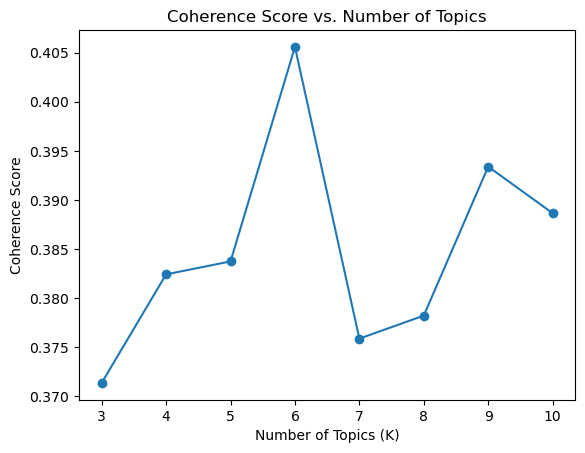

Optimal number of topics (K): 6


In [ ]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

# Convert text data to a list of tokenized documents
tokenized_documents = [doc.split() for doc in data['clean_abstract']]

# Create a dictionary representation of the documents
dictionary = Dictionary(tokenized_documents)

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

# Function to compute coherence score for a given LDA model
def compute_coherence_score(corpus, dictionary, texts, k):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Compute coherence scores for different values of K
min_topics = 3
max_topics = 10
step_size = 1
coherence_scores = []
for k in range(min_topics, max_topics + 1, step_size):
    coherence_score = compute_coherence_score(corpus, dictionary, tokenized_documents, k)
    coherence_scores.append((k, coherence_score))

# Plot coherence scores
plt.plot(*zip(*coherence_scores), marker='o')
plt.xlabel('Number of Topics (K)')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Topics')
plt.show()

# Choose the optimal number of topics based on the coherence score
optimal_k = max(coherence_scores, key=lambda x: x[1])[0]
print("Optimal number of topics (K):", optimal_k)


In [ ]:
# Train LDA model with the optimal number of topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_k, random_state=42)

# Get the topics and their top words
topics = lda_model.print_topics(num_words=10)

# Print the topics and their top words
for topic in topics:
    print(topic)


(0, '0.018*"teacher" + 0.009*"decision" + 0.009*"tool" + 0.008*"challenge" + 0.007*"literacy" + 0.006*"trust" + 0.006*"team" + 0.005*"science" + 0.005*"opportunity" + 0.005*"aied"')
(1, '0.009*"hybrid" + 0.008*"chatbots" + 0.008*"srl" + 0.007*"regulation" + 0.007*"barrier" + 0.007*"intelligent" + 0.006*"aied" + 0.006*"humanai" + 0.005*"future" + 0.005*"response"')
(2, '0.036*"teacher" + 0.011*"tool" + 0.009*"humanai" + 0.008*"k12" + 0.007*"ethic" + 0.006*"future" + 0.006*"mmla" + 0.006*"collaboration" + 0.005*"technological" + 0.005*"learnersourcing"')
(3, '0.009*"teacher" + 0.008*"chatgpt" + 0.008*"role" + 0.007*"writing" + 0.006*"prediction" + 0.006*"science" + 0.006*"exam" + 0.006*"tool" + 0.006*"future" + 0.005*"attitude"')
(4, '0.017*"aied" + 0.013*"teacher" + 0.008*"ethical" + 0.008*"graduation" + 0.007*"engagement" + 0.007*"retention" + 0.007*"policy" + 0.005*"field" + 0.005*"humanai" + 0.005*"aigenerated"')
(5, '0.009*"teacher" + 0.007*"literacy" + 0.007*"future" + 0.007*"langu

slr (Self-Regulated Learning)
mmla (Multimodal Learning Analytics)
aigenerated (AI-generated)
sa (maybe Student Assessment)

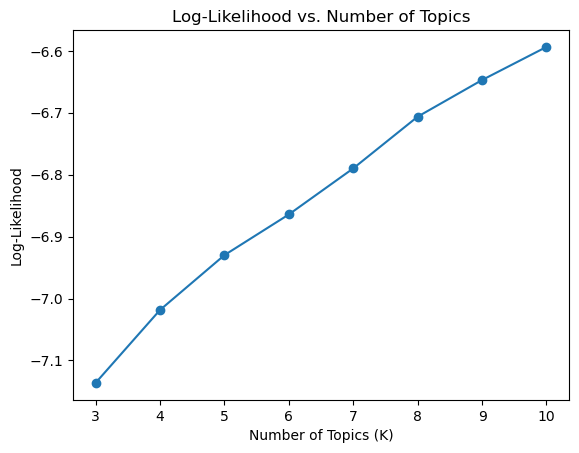

In [ ]:
# Step 1: Visualize the log-likelihood values
log_likelihood_values = []
for k, coherence_score in coherence_scores:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42)
    log_likelihood_values.append((k, lda_model.log_perplexity(corpus)))

plt.plot(*zip(*log_likelihood_values), marker='o')
plt.xlabel('Number of Topics (K)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Number of Topics')
plt.show()


In [ ]:
# Step 2: Identify the most emerging keywords from each topic and create a name for each topic
topic_keywords = []
for topic_id, topic in topics:
    top_keywords = [word for word, _ in lda_model.show_topic(topic_id)]
    topic_keywords.append((topic_id, top_keywords))

# Print topics and their keywords
for topic_id, keywords in topic_keywords:
    print(f"Topic {topic_id}: {', '.join(keywords)}")



Topic 0: challenge, decision, literacy, team, teacher, tool, confidence, opportunity, aied, science
Topic 1: hybrid, regulation, srl, alt, humanai, hhair, response, explanation, future, analytics
Topic 2: teacher, tool, mmla, ethic, k12, learnersourcing, humanai, future, social, aibased
Topic 3: chatgpt, exam, role, teacher, prediction, writing, recommendation, l2, science, across
Topic 4: aied, ethical, teacher, policy, aigenerated, haiku, device, field, acceptance, collaboration
Topic 5: literacy, sa, trend, future, teacher, ethical, challenge, opportunity, stakeholder, simulationbased


In [ ]:
# Step 3: Create the LDA graph (intertopic distance map)
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.043500 -0.026651       1        1  13.596888
7     -0.113904  0.044937       2        1  11.861048
3     -0.003872 -0.079303       3        1  11.347638
6      0.118607 -0.181258       4        1  10.602344
5     -0.036380 -0.015430       5        1   9.789671
9     -0.012212  0.051933       6        1   9.145311
4      0.096518  0.008504       7        1   9.045924
8     -0.134109  0.065251       8        1   9.007031
2     -0.041376 -0.050473       9        1   8.993312
1      0.170228  0.182491      10        1   6.610832, topic_info=            Term         Freq        Total Category  logprob  loglift
447      teacher  3482.000000  3482.000000  Default  30.0000  30.0000
822         aied  1196.000000  1196.000000  Default  29.0000  29.0000
177       hybrid   371.000000   371.000000  Default  28.0000  28.0000
202   regulation   393.000000   393.000000  Default  27.0000  27.0000
1351  graduation   404.000000   404.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
628        agent    83.094106   599.707561  Topic10  -5.1808   0.7400
193       people    65.009867   285.018012  Topic10  -5.4262   1.2384
63    capability    66.745085   354.734884  Topic10  -5.3999   1.0460
781      machine    68.543173   612.773545  Topic10  -5.3733   0.5259
145     adaptive    62.901843   301.637445  Topic10  -5.4592   1.1488

[819 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1327      1  0.014683        0909
1327      2  0.014683        0909
1327      3  0.044050        0909
1327      4  0.792909        0909
1327      7  0.044050        0909
...     ...       ...         ...
2938      2  0.891100  yearsihdes
2938      8  0.055694  yearsihdes
1090      2  0.034191       youth
1090      7  0.034191       youth
1090      9  0.923165       youth

[3460 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 8, 4, 7, 6, 10, 5, 9, 3, 2])

In [ ]:
import gensim
import pyLDAvis.gensim_models

num_topics = 6
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.021928 -0.103488       1        1  20.863691
2     -0.067942  0.101406       2        1  19.079718
4     -0.010147  0.036575       3        1  17.081533
0     -0.077371  0.071477       4        1  15.579745
5      0.212576  0.027416       5        1  14.199195
1     -0.035189 -0.133387       6        1  13.196119, topic_info=             Term         Freq        Total Category  logprob  loglift
447       teacher  3344.000000  3344.000000  Default  30.0000  30.0000
202    regulation   395.000000   395.000000  Default  29.0000  29.0000
1318          srl   334.000000   334.000000  Default  28.0000  28.0000
177        hybrid   365.000000   365.000000  Default  27.0000  27.0000
1351   graduation   330.000000   330.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
447       teacher   146.124898  3344.731823   Topic6  -5.3075  -1.1054
562      attitude   100.084218   461.318707   Topic6  -5.6860   0.4972
308   interaction   106.349227   933.902543   Topic6  -5.6253  -0.1474
93         future   108.254372  1191.767472   Topic6  -5.6075  -0.3735
450         trust    99.543606   637.583222   Topic6  -5.6914   0.1682

[528 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1326      2  0.035203   0885
1326      3  0.915266   0885
1326      4  0.035203   0885
1326      5  0.035203   0885
1327      1  0.017875   0909
...     ...       ...    ...
338       2  0.642238  young
338       3  0.048602  young
338       4  0.003472  young
338       5  0.114561  young
338       6  0.170106  young

[1750 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 5, 1, 6, 2])

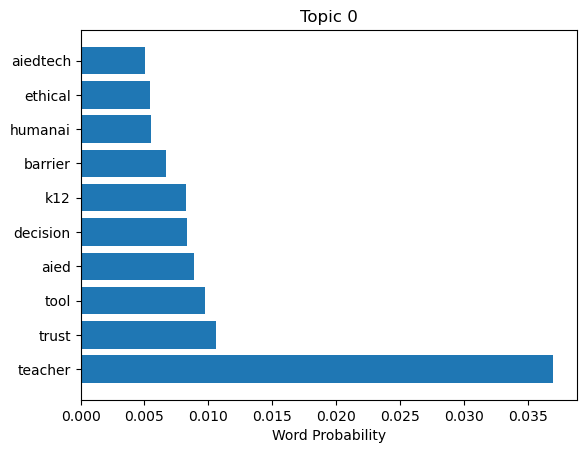

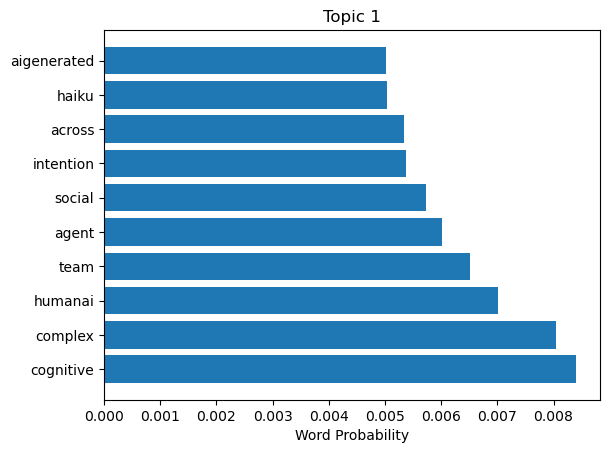

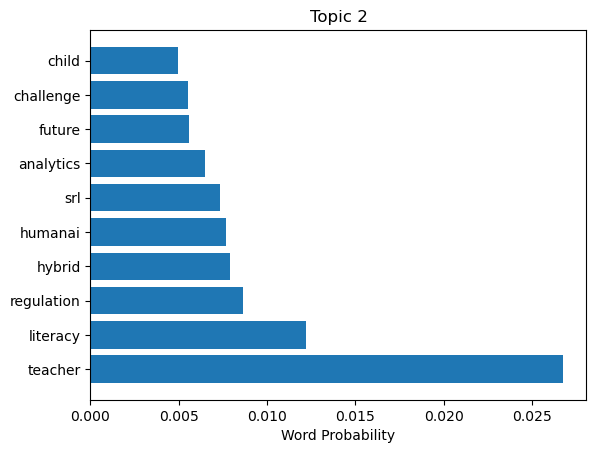

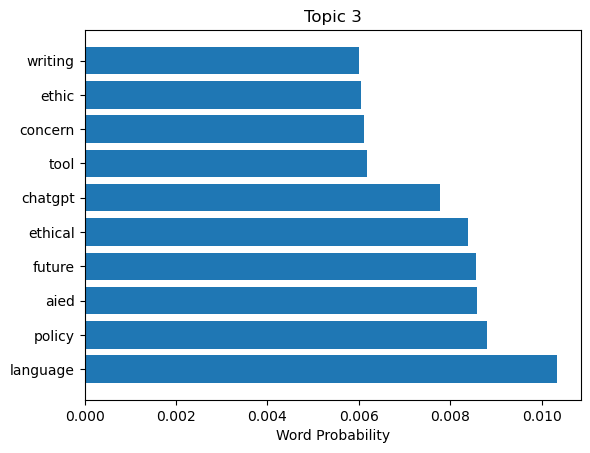

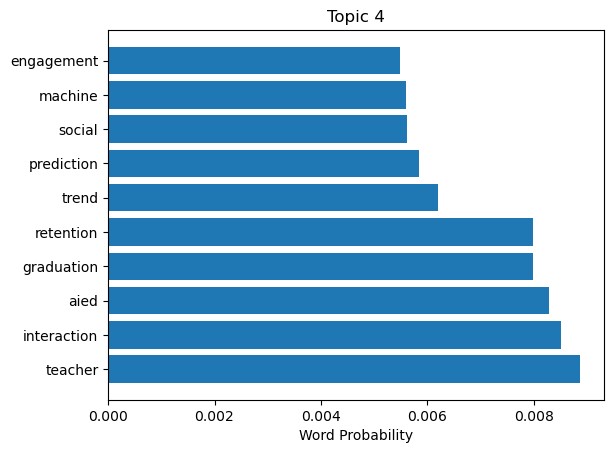

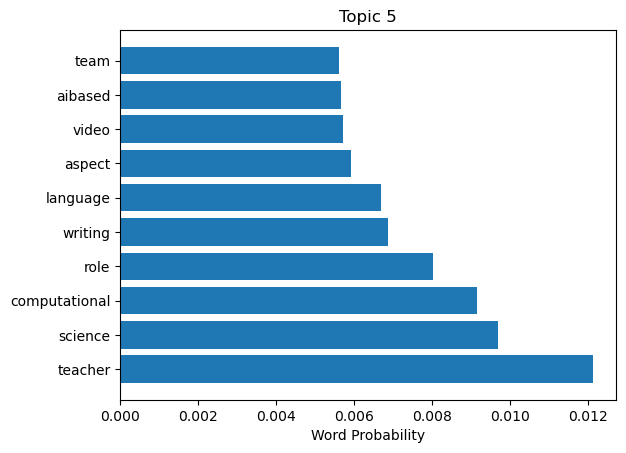

In [ ]:
# Step 4: Create a bar plot for each topic
for topic_id, top_keywords in topic_keywords:
    plt.figure()
    plt.barh(range(len(top_keywords)), [val for _, val in lda_model.show_topic(topic_id)], align='center')
    plt.yticks(range(len(top_keywords)), [word for word, _ in lda_model.show_topic(topic_id)])
    plt.xlabel('Word Probability')
    plt.title(f'Topic {topic_id}')
    plt.show()

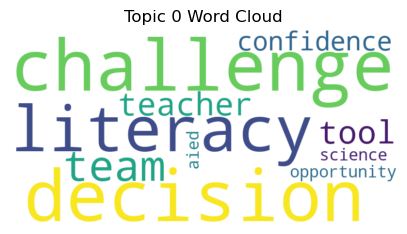

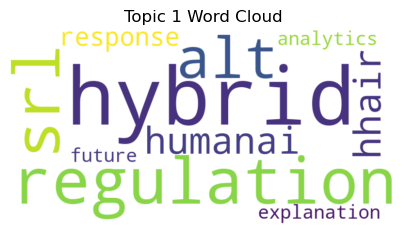

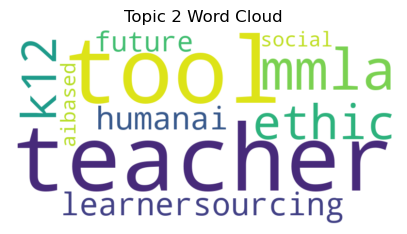

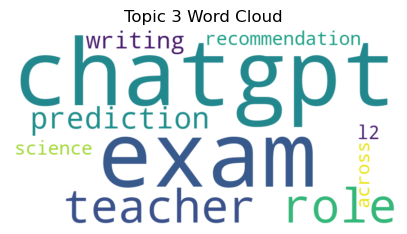

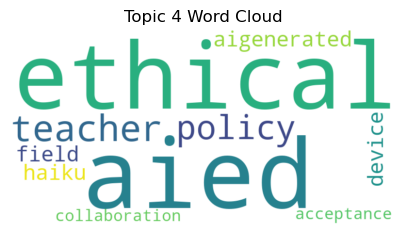

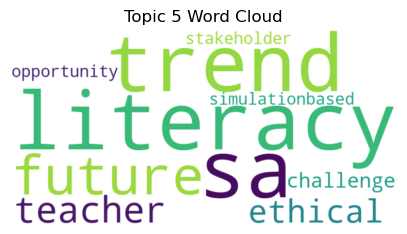

In [ ]:
# Step 5: Create a word cloud for each topic
from wordcloud import WordCloud

for topic_id, top_keywords in topic_keywords:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_keywords))
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_id} Word Cloud')
    plt.show()